In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop("User ID", axis=1, inplace=True)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [10]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

In [13]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [14]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [50]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [51]:
train_accuracy = accuracy_score(y_train, dt_classifier.predict(X_train))

In [52]:
train_accuracy

1.0

In [53]:
test_pred = dt_classifier.predict(X_test)

In [54]:
test_accuracy = accuracy_score(y_test, test_pred)

In [55]:
test_accuracy

0.9

In [56]:
dt_classifier_gini = DecisionTreeClassifier()

In [57]:
dt_classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
train2 = accuracy_score(y_train, dt_classifier_gini.predict(X_train))
train2

1.0

In [59]:
testpred2 = dt_classifier_gini.predict(X_test)

In [60]:
testaccuracy2 = accuracy_score(y_test, testpred2)

In [61]:
testaccuracy2

0.925

In [62]:
cm = confusion_matrix(y_test, test_pred)

In [63]:
cm

array([[54,  4],
       [ 4, 18]], dtype=int64)

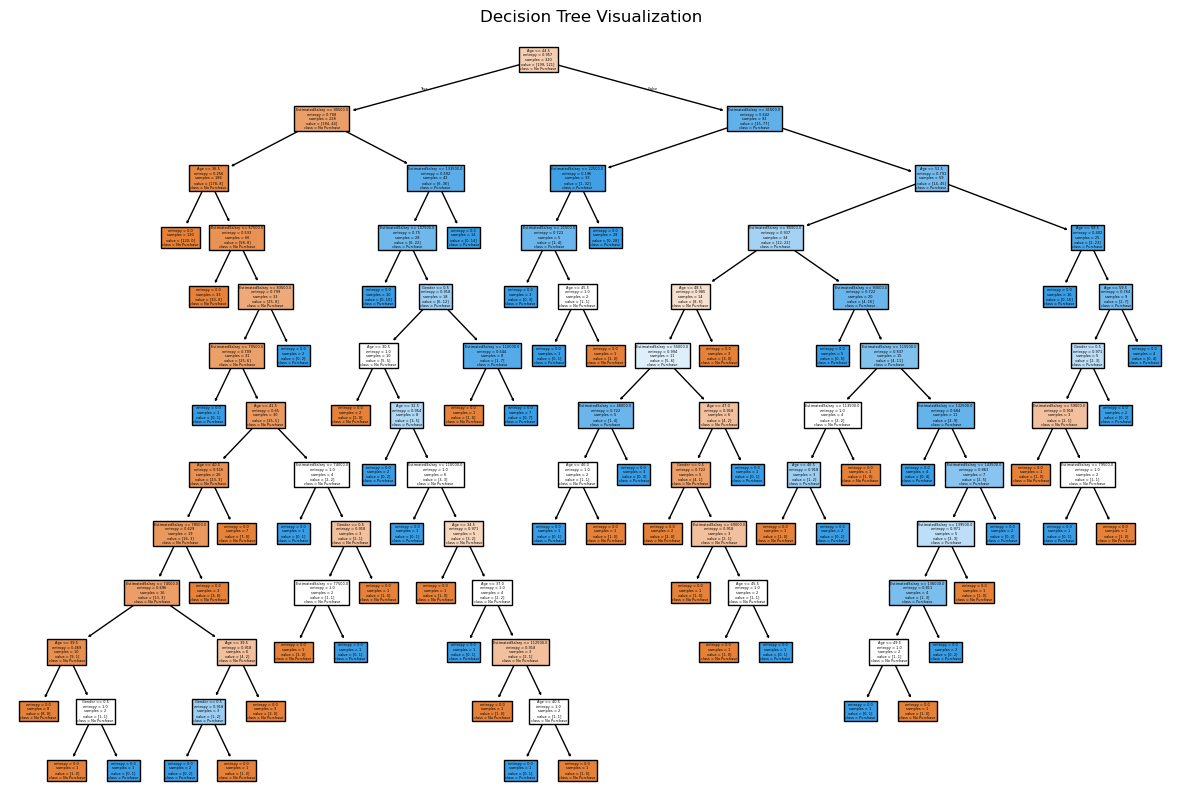

In [65]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_classifier, 
               filled=True, 
               feature_names=['Gender','Age','EstimatedSalary'], 
               class_names=['No Purchase', 'Purchase'])

plt.title("Decision Tree Visualization")
plt.show()


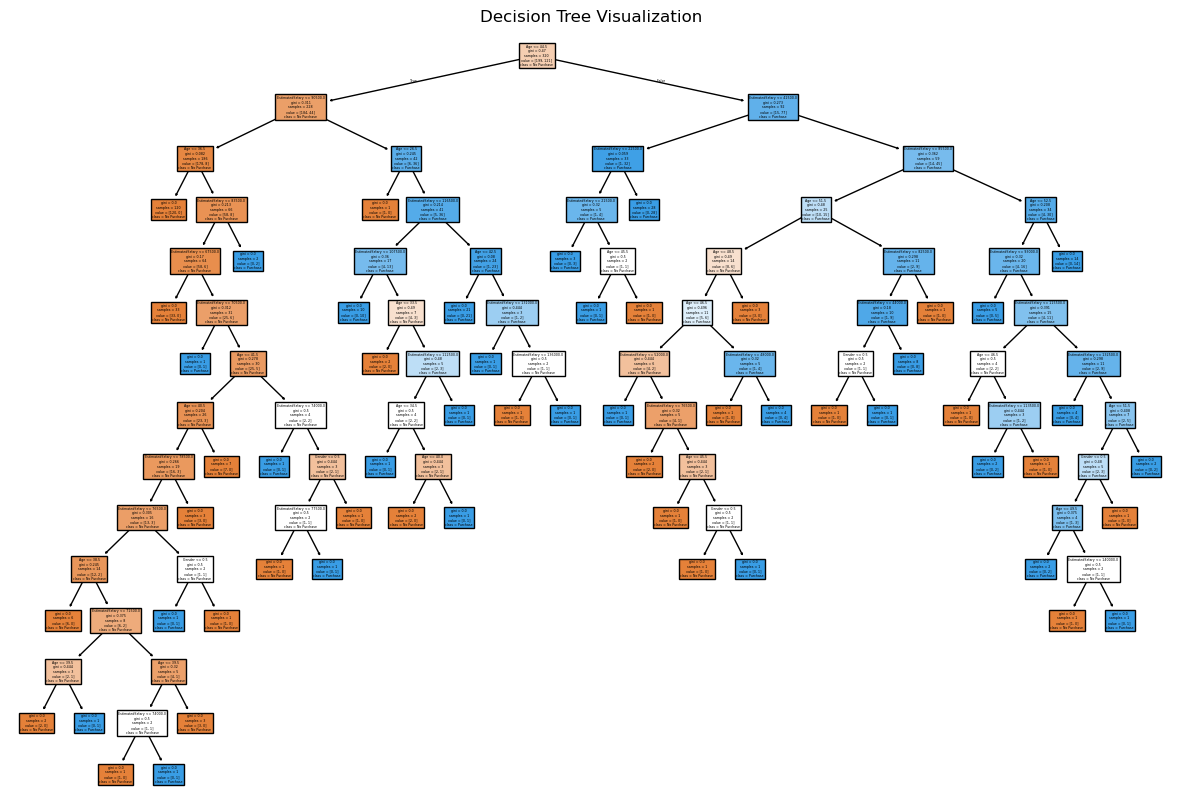

In [66]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_classifier_gini, 
               filled=True, 
               feature_names=['Gender','Age','EstimatedSalary'], 
               class_names=['No Purchase', 'Purchase'])

plt.title("Decision Tree Visualization")
plt.show()